In [2]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from numpy.linalg import norm
from mpl_toolkits.mplot3d import Axes3D 

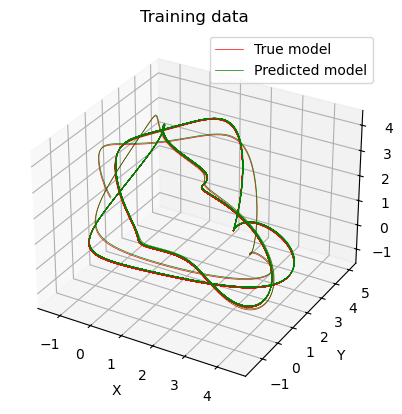

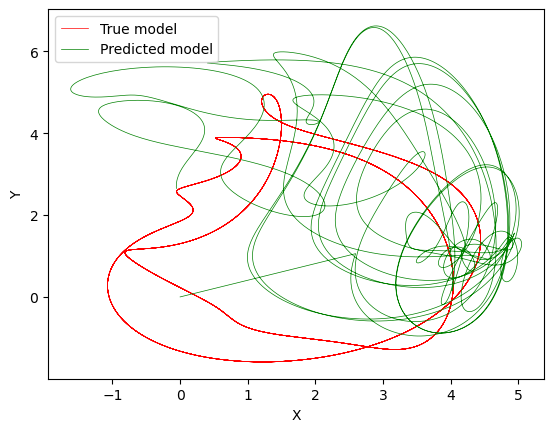

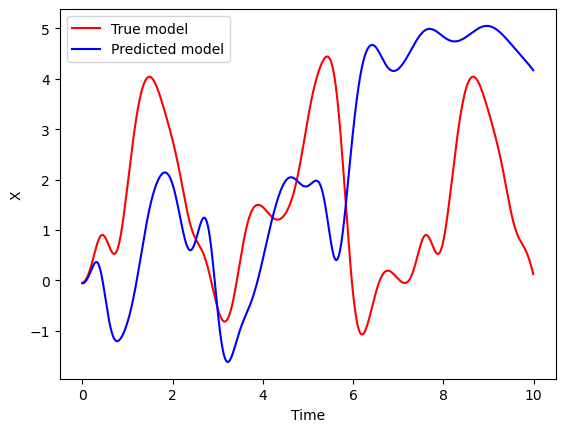

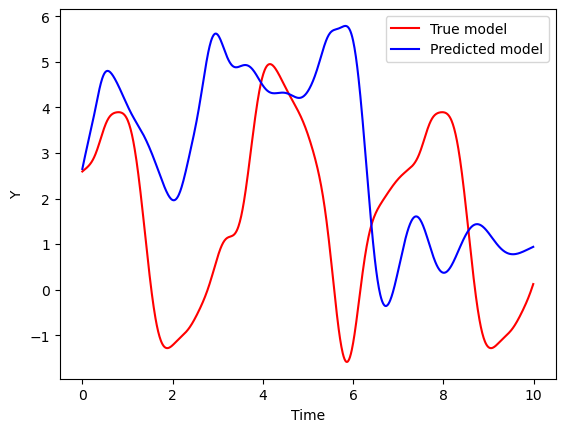

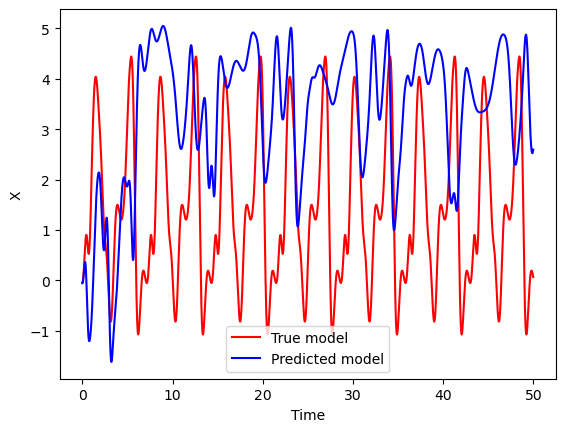

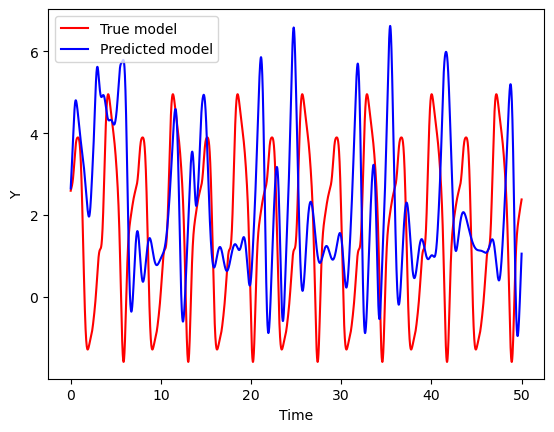

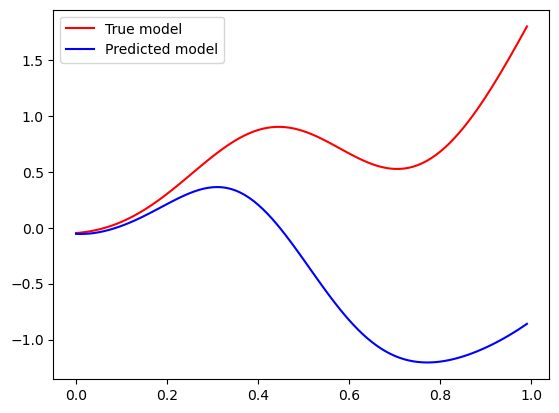

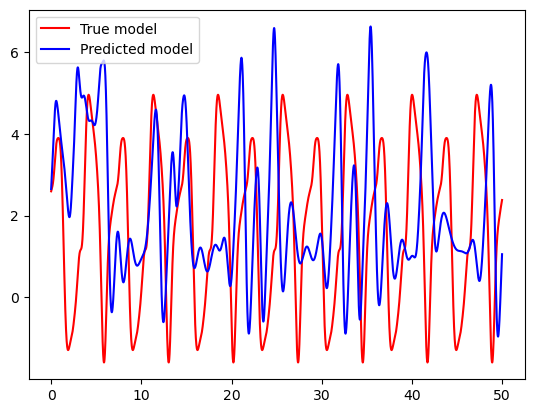

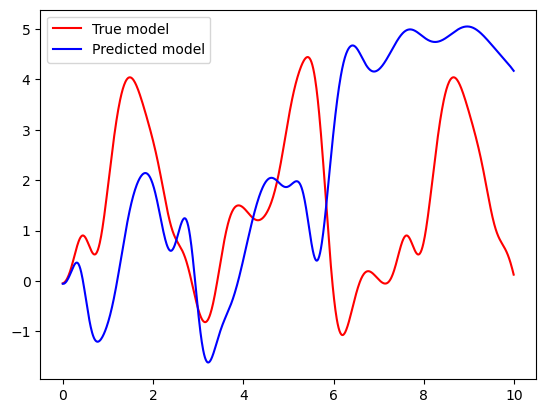

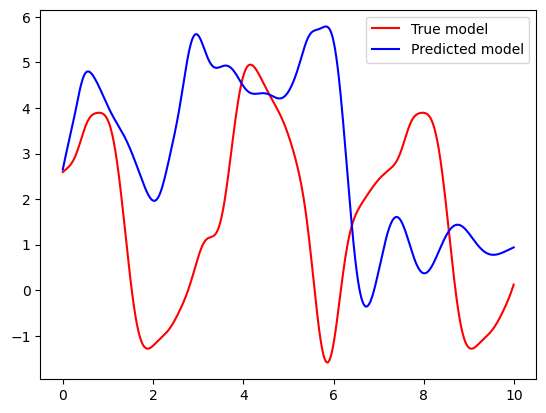

In [16]:
### Initializing parameters for training

## Lorenz96 system parameters 
F = 3.5

## Reservoir parameters
n = 2000                    # reservoir size
m = 8                       # number of dimensions in the system  
mu = 1.2                      # Spectral radius of reservoir adjacency matrix
lam = 1e-8              # Lambda for ridge regression

## Simulation parameters
T = 100
dt = 0.01
ntraining = int(T / dt)
trainingtimes = np.linspace(0, T, ntraining + 1)

## Generate random sparse reservoir adjacency matrix A
A1 = sp.random(n, n, density=6/n, format='csr')    # n x n sparse matrix with values between   
A1 = A1 - 0.5 * np.sign(A1.toarray())              # All non-zero terms are shifted left by 0.5
A1 = A1 * mu / np.abs(sp.linalg.eigs(A1, k=1)[0])  # normalize reservoir matrix 
A = sp.csr_matrix(A1)

## Generate random Win matrix to have entries with values between -0.01 to 0.01
# Win = 0.01 * (2.0 * np.random.rand(n, m) - 1) ######## Ask about scaling - he didn't have 0.01*
Win =  0.1*(2.0 * np.random.rand(n, m) - 1)

### Training reservoir to model the system

## Inital state of Sprott-Linz system, time-series data of reservoir states R 
## and time-series data of system states f
x0 = 1.0 * np.random.rand(m) - 0.5
x = x0
R = np.zeros((n, ntraining))
f = np.zeros((m, ntraining))

## Generate random intial state for reservoir with values between -0.5 to 0.5
#rpid0 = 0.5 - 1.0 * np.random.rand(n) ########## Ask about scaling - he has it between -1 to 1, we have it as -0.5 to 0.5
rpid0 = 2*(0.5 - 1.0 * np.random.rand(n))
rpid = rpid0

## Collecting reservoir time-series data
for t in range(ntraining):

    u = x
    R[:, t] = rpid
    

    xp = (np.roll(x, -1) - np.roll(x, 2)) * np.roll(x, 1) - x + F 
    

    x += dt * xp

    rpid = np.tanh(A.dot(rpid) + Win.dot(u) + 1)
    #f[:, t] = np.array([x, y, z])
    f[:, t] = u

## Finding Wout matrix using ridge regression

f = f[:, 1000:]
R = R[:, 1000:]

Wout_pid = f.dot(R.T).dot(np.linalg.inv(R.dot(R.T) + lam * np.eye(n)))  

## Checking training data

tempout = Wout_pid.dot(R)
plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(f[0], f[1], f[2], 'r', linewidth = 0.5, label = 'True model')
ax.plot3D(tempout[0], tempout[1], tempout[2], 'g', linewidth = 0.5, label = 'Predicted model')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training data')
plt.show()

## Initializing testing parameters
Ttest = 50
ntest = int(Ttest / dt)
testingtimes = np.linspace(0, Ttest, ntest + 1)

## For storing x time series data of ideal system
xpure = np.zeros((m, ntest))


## For storing x time series data of predicted system
xtrack = np.zeros((m, ntest + 1))             

xxpure = x
xxtrack = x

## Time evolution
for t in range(ntest):

    ## Ideal system

    xxpurep = (np.roll(xxpure, -1) - np.roll(xxpure, 2)) * np.roll(xxpure, 1) - xxpure + F 
    xxpure += dt * xxpurep
    
    xpure[:, t] = xxpure
      
    ## Forecasting

    rpid = np.tanh(A.dot(rpid) + Win.dot(xxtrack) + np.ones(n))
    xxtrack = Wout_pid.dot(rpid)

    xtrack[:, t] = xxtrack


 



plt.figure()
plt.plot(xpure[0], xpure[1], 'r', linewidth = 0.5, label = 'True model')
plt.plot(xtrack[0], xtrack[1], 'g', linewidth = 0.5, label = 'Predicted model')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

plt.figure()
plt.plot(testingtimes[:1000], xpure[0, :1000], 'r', label = 'True model')
plt.plot(testingtimes[:1000], xtrack[0, :1000],  'b', label = 'Predicted model')
plt.legend()
plt.xlabel('Time')
plt.ylabel('X')
plt.show()


plt.figure()
plt.plot(testingtimes[:1000], xpure[1, :1000], 'r', label = 'True model')
plt.plot(testingtimes[:1000], xtrack[1, :1000],  'b', label = 'Predicted model')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Y')
plt.show()

plt.figure()
plt.plot(testingtimes[:ntest], xpure[0, :ntest], 'r', label = 'True model')
plt.plot(testingtimes[:ntest], xtrack[0, :ntest],  'b', label = 'Predicted model')
plt.legend()
plt.xlabel('Time')
plt.ylabel('X')
plt.show()


plt.figure()
plt.plot(testingtimes[:ntest], xpure[1, :ntest], 'r', label = 'True model')
plt.plot(testingtimes[:ntest], xtrack[1, :ntest],  'b', label = 'Predicted model')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Y')
plt.show()

plt.figure()
plt.plot(testingtimes[:100], xpure[0, :100], 'r', label = 'True model')
plt.plot(testingtimes[:100], xtrack[0, :100],  'b', label = 'Predicted model')
plt.legend()
plt.show()

plt.figure()
plt.plot(testingtimes[:ntest], xpure[1, :ntest], 'r', label = 'True model')
plt.plot(testingtimes[:ntest], xtrack[1, :ntest],  'b', label = 'Predicted model')
plt.legend()
plt.show()

plottimerange = np.arange(0, 1000)

plt.figure()
plt.plot(testingtimes[plottimerange], xpure[0, plottimerange], 'r', label = 'True model')
plt.plot(testingtimes[plottimerange], xtrack[0, plottimerange],  'b', label = 'Predicted model')
plt.legend()
plt.show()

plt.figure()
plt.plot(testingtimes[plottimerange], xpure[1, plottimerange], 'r', label = 'True model')
plt.plot(testingtimes[plottimerange], xtrack[1, plottimerange],  'b', label = 'Predicted model')
plt.legend()
plt.show()



